In [2]:
import sklearn
print(sklearn.__version__)


1.6.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
#importing required modules

In [4]:
df=pd.read_csv("creditcard.csv")
df.head(3)
# just checking for the import are right and csv file getting read.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
fraud=df[df['Class'] == 1]
fraud.head(2)
fraud.count()
# printing the fraud


Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [6]:
genuine=df[df['Class'] == 0]
genuine.head(2)
genuine.count()
#getting the genuine transaction

Time      284315
V1        284315
V2        284315
V3        284315
V4        284315
V5        284315
V6        284315
V7        284315
V8        284315
V9        284315
V10       284315
V11       284315
V12       284315
V13       284315
V14       284315
V15       284315
V16       284315
V17       284315
V18       284315
V19       284315
V20       284315
V21       284315
V22       284315
V23       284315
V24       284315
V25       284315
V26       284315
V27       284315
V28       284315
Amount    284315
Class     284315
dtype: int64

In [7]:


outlier_fraction = len(fraud) / len(genuine)
print(f"Outlier Fraction       : {outlier_fraction:.6f}")
print(f"Fraud Percentage       : {(len(fraud) / len(df)) * 100:.4f}%")
#Here the fraud percentage is less,so we have to do make the fraud and genuine ttranscation some what equal 
#Now we have to do SMOTE+Undersampling 
#SMOTE-->is used to automaticaly create a synthetic data of which class has less percentage
#Undersampling-->is used to reduce the data that class has high majority


Outlier Fraction       : 0.001730
Fraud Percentage       : 0.1727%


In [8]:
#importing the sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
X=df.drop(['Class'],axis=1)
y=df['Class']
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [34]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
import numpy as np

# 1. Sample data (replace with your actual data)


# 2. Split into training and testing sets (CORRECT ORDER HERE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. Verify data types
print(type(X_train))
print(type(y_train))

# 4. Define the resampling methods
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Oversample minority to 10% of majority
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)

# 5. Define the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 6. Create a pipeline
model = Pipeline([('o', smote), ('u', under), ('r', rf)])

# 7. Fit the pipeline on the training data
model.fit(X_train, y_train)

# 8. Make predictions (example)
y_scores = model.predict_proba(X_test)[:, 1]
y_pred = (y_scores > 0.95).astype(int) 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.69      0.79        98

    accuracy                           1.00     56962
   macro avg       0.96      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy: 99.9367999719111
[0 0 0 ... 0 0 0]


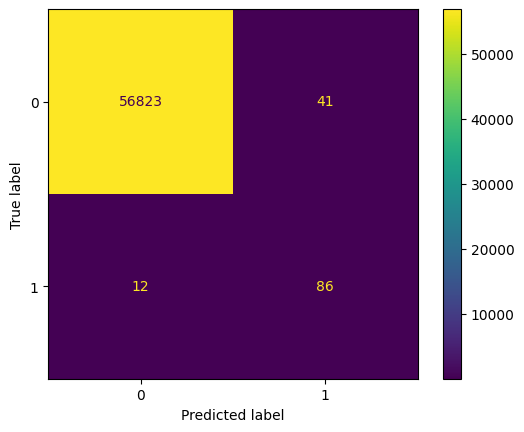

In [35]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print(y_pred)